<a href="https://colab.research.google.com/github/KoSeoAh/ML_2022/blob/main/2)_%EC%A3%BC%EA%B0%80_%EC%98%88%EC%B8%A1_%EA%B8%B0%EC%A3%BC%EB%8B%98%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# 감성지표

In [ ]:
dic = pd.read_csv('/content/drive/MyDrive/ML/최종 감성사전.csv')
article = pd.read_csv('/content/drive/MyDrive/ML/날짜별 기사.csv')

In [ ]:
dic = dic.rename(columns={'Unnamed: 0':'단어'})
dic = dic.set_index('단어')
dic

,감성점수
단어,
가격,0.123502
가능,0.668749
가동,-0.713170
가속,0.272045
가솔린,-0.200111
...,...
후퇴,-0.194861
훈풍,-0.222705
흥행,-0.450054


In [ ]:
article = article.set_index('Date')
article

,Noun
Date,
2017-04-03,기아차 카니발 출시 본격 판매 기아차 월 해외 내수 판매 울상 전년 르노삼성 월 약...
2017-04-04,현대 기아차 개 차종 레드 닷 디자인 수상 현대 기아차 미국 판매 뚝 현대 기아...
2017-04-05,적자 인정 대신 기부금 억 기아 챔피 언스 필드 운영 결론 기아차 직원 평균 근속 ...
2017-04-06,기아차 광주 공장 독거 노인 가구 사랑 배달 기아차 년 모하 출시 맞춤 사양 추가 ...
2017-04-07,현대 기아 미국 만 대 리콜 확정 캐나다 만 대 협의 종합 현대 기아차 세타 엔진 ...
...,...
2021-08-02,기아 월 만 대 판매 해외 증가 사전 예약 돌풍 기아 출시 가격 천 만 원 기아 전...
2021-08-03,현대차 기아 벤츠 강 체제 르 쌍 쉐 현대차 기아 반도체 대란 친환경 차 판매 기아...
2021-08-04,현대차 기아 제네시스 개월 판매 신기록 행진 반도체 대란 현대차 기아 현대차...


In [ ]:
scores = []

for idx in article.index:
  tmp = article.loc[idx]['Noun'].split()
  sc = 0
  for w in tmp:
    if w in dic.index:
      sc += dic.loc[w]['감성점수']
    else:
      continue
  scores.append(sc)

In [ ]:
sentiment = pd.DataFrame(scores)
sentiment.transpose()
sentiment.index = article.index
sentiment.index = pd.to_datetime(sentiment.index)
sentiment = sentiment.rename(columns={0:'단어'})
sentiment

,단어
Date,
2017-04-03,63.459729
2017-04-04,-66.129121
2017-04-05,6.103547
2017-04-06,104.535441
2017-04-07,-79.332146
...,...
2021-08-02,-13.492296
2021-08-03,96.894534
2021-08-04,56.495153


# 기술지표

In [ ]:
def remove_comma(x):
  return x.replace(',', '')

def convert_vol(x):
  num = x.strip(x[-1])
  num = float(num)
  if x[-1] == 'K':
    return num * 1000
  elif x[-1] == 'M':
    return num * 1000000
  else:
    return num * 1000000000

In [ ]:
tech = pd.read_csv('/content/drive/MyDrive/ML/거래량, 코스피 지수.csv')
tech = tech[['Date', 'Price', 'Vol.']]
tech['Date'] = tech['Date'].apply(lambda x: x.replace(',', ''))
tech['Date'] = tech['Date'].apply(lambda x: pd.to_datetime(x, format='%b %d %Y'))
tech.index = tech['Date']
tech = tech.drop(['Date'], axis='columns')
tech = tech.sort_index(ascending=True)
tech['Price'] = tech['Price'].apply(remove_comma)
tech['Price'] = tech['Price'].astype(float)
tech['Vol.'] = tech['Vol.'].apply(convert_vol)
tech. rename(columns = {'Price':'거래량', 'Vol.':'코스피 지수'}, inplace = True)
tech.head()

,거래량,코스피 지수
Date,,
2017-03-02,2102.65,434710000.0
2017-03-03,2078.75,425940000.0
2017-03-06,2081.36,431440000.0
2017-03-07,2094.05,277830000.0
2017-03-08,2095.41,381440000.0


# 거시경제지표

In [ ]:
currency = pd.read_csv('/content/drive/MyDrive/ML/환율.csv')
currency = currency[['날짜', '종가']]
currency. rename(columns = {'날짜':'Date', '종가':'환율'}, inplace = True)
currency['Date'] = currency['Date'].apply(lambda x: pd.to_datetime(x, format='%Y년 %m월 %d일'))
currency.index = currency['Date']
currency = currency.drop(['Date'], axis='columns')
currency = currency.sort_index(ascending=True)
currency['환율'] = currency['환율'].apply(remove_comma)
currency['환율'] = currency['환율'].astype(float)
currency

,환율
Date,
2017-03-01,1140.23
2017-03-02,1150.71
2017-03-03,1152.32
2017-03-06,1155.15
2017-03-07,1150.67
...,...
2022-03-25,1225.08
2022-03-28,1223.65
2022-03-29,1207.35


In [ ]:
ir = pd.read_csv('/content/drive/MyDrive/ML/이자율.csv', encoding='cp949')
ir.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
ir['Date'] = ir['Date'].apply(lambda x: pd.to_datetime(x, format='%b-%d'))
ir.index = ir['Date']
ir = ir.drop(['Date'], axis='columns')
ir

,금리
Date,
1900-03-17,1.25
1900-04-17,1.25
1900-05-17,1.25
1900-06-17,1.25
1900-07-17,1.25
...,...
1900-11-21,1.00
1900-12-21,1.00
1900-01-22,1.25


In [ ]:
macro = pd.concat([currency, ir], axis=1)
macro['금리'].fillna(method='ffill', inplace=True)
macro.dropna(inplace=True)
macro

,환율,금리
Date,,
2017-03-01,1140.23,1.0
2017-03-02,1150.71,1.0
2017-03-03,1152.32,1.0
2017-03-06,1155.15,1.0
2017-03-07,1150.67,1.0
...,...,...
2022-03-25,1225.08,1.0
2022-03-28,1223.65,1.0
2022-03-29,1207.35,1.0


# 최종 데이터셋

In [ ]:
tmp = pd.concat([sentiment, tech, macro], axis=1)
tmp.dropna(inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(tmp)
tmp_scaled = scaler.transform(tmp)

tmp = pd.DataFrame(tmp_scaled, columns=tmp.columns, index=tmp.index)
tmp

,단어,거래량,코스피 지수,환율,금리
Date,,,,,
2017-04-03,0.342962,-0.567695,-0.609847,-0.549995,0.0
2017-04-04,-0.829121,-0.585049,-0.303234,-0.366252,0.0
2017-04-05,-0.175804,-0.585725,-0.180172,-0.291533,0.0
2017-04-06,0.714477,-0.607654,-0.332834,-0.220574,0.0
2017-04-07,-0.948538,-0.610415,-0.585160,-0.065731,0.0
...,...,...,...,...,...
2021-08-02,-0.353041,2.289863,-0.206695,0.223041,0.0
2021-08-03,0.645367,2.328034,0.022830,0.182157,0.0
2021-08-04,0.279970,2.445095,-0.029943,0.095690,0.0


In [ ]:
ttmp = pd.read_csv('/content/drive/MyDrive/ML/updown2.csv')
ttmp.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
ttmp['Date'] = ttmp['Date'].apply(lambda x: pd.to_datetime(x))
ttmp.index = ttmp['Date']
ttmp = ttmp.drop(['Date'], axis='columns')
ttmp = ttmp.shift(1)
ttmp = ttmp['기아']

In [ ]:
final = pd.concat([tmp, ttmp], axis=1)
final.dropna(inplace=True)
final

,단어,거래량,코스피 지수,환율,금리,기아
Date,,,,,,
2017-04-03,0.342962,-0.567695,-0.609847,-0.549995,0.0,2.0
2017-04-04,-0.829121,-0.585049,-0.303234,-0.366252,0.0,2.0
2017-04-05,-0.175804,-0.585725,-0.180172,-0.291533,0.0,0.0
2017-04-06,0.714477,-0.607654,-0.332834,-0.220574,0.0,0.0
2017-04-07,-0.948538,-0.610415,-0.585160,-0.065731,0.0,0.0
...,...,...,...,...,...,...
2021-08-02,-0.353041,2.289863,-0.206695,0.223041,0.0,0.0
2021-08-03,0.645367,2.328034,0.022830,0.182157,0.0,0.0
2021-08-04,0.279970,2.445095,-0.029943,0.095690,0.0,2.0


# 검증

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
train, test = final.iloc[:980], final.iloc[980:]

In [ ]:
X_train = train[['거래량', '코스피 지수', '환율', '금리']].to_numpy()
X_test = test[['거래량', '코스피 지수', '환율', '금리']].to_numpy()
y_train = train['기아'].to_numpy()
y_test = test['기아'].to_numpy()

아래와 같이 파라미터를 조정하며 최적의 성과를 보이는 파라미터 탐색.


* G-NB: default
* DT
  * `criterion = {‘gini’, ‘entropy’}`
* RF
  * `n_estimators = 1500`
  * `criterion = {‘gini’, ‘entropy’}`
  * `oob_score = {True}`
* GB
  * `n_estimators = 500`
  * `criterion = {‘friedman_mse’}`
  * `learning_rate = {0.001, 0.01, 0.1}`
* XGB
  * `booster = {‘gbtree’, ‘gblinear’, ‘dart’}`
* MLP
  * `shuffle = {True, False}`
  * `alpha = {0.0001, 0.01, 1, 10}`
  * `max_iter = {800}`
* SVM
  * `kernel = {‘linear’, ‘rbf’, ‘poly’}`
  * `C = {0.001, 0.01, 0.1, 1}`

* LR
  * `C = {0.001, 0.01, 0.1, 1, 10}`
* KNN
  * `n_neighbors = {3, 8, 15}`
  * `weights = {‘uniform’, ‘distance’}`



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

acc = metrics.accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

Accuracy:  0.5172413793103449
MSE:  1.896551724137931


In [ ]:
acc_nb = acc
mse_nb = mse

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion='gini')

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.3563218390804598
MSE:  2.2298850574712645


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0114942528735633


In [ ]:
acc_dt = metrics.accuracy_score(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=1500, criterion='gini', oob_score=True)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4482758620689655
MSE:  2.1724137931034484


In [ ]:
clf = RandomForestClassifier(n_estimators=1500, criterion='entropy', oob_score=True)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4482758620689655
MSE:  2.1724137931034484


In [ ]:
acc_rf = metrics.accuracy_score(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=500, criterion='friedman_mse', learning_rate=0.001)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.45977011494252873
MSE:  2.1264367816091956


In [ ]:
clf = GradientBoostingClassifier(n_estimators=500, criterion='friedman_mse', learning_rate=0.01)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4482758620689655
MSE:  2.1724137931034484


In [ ]:
clf = GradientBoostingClassifier(n_estimators=500, criterion='friedman_mse', learning_rate=0.1)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
acc_gb = metrics.accuracy_score(y_test, y_pred)
mse_gb = mean_squared_error(y_test, y_pred)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(booster='gbtree')

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4827586206896552
MSE:  2.0344827586206895


In [ ]:
clf = XGBClassifier(booster='gblinear')

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = XGBClassifier(booster='dart')

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4827586206896552
MSE:  2.0344827586206895


In [ ]:
acc_xgb = metrics.accuracy_score(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)

## Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(shuffle=True, alpha=0.0001, max_iter=800)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.5287356321839081
MSE:  1.8505747126436782


In [ ]:
clf = MLPClassifier(shuffle=True, alpha=0.01, max_iter=800)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.5287356321839081
MSE:  1.8505747126436782


In [ ]:
clf = MLPClassifier(shuffle=True, alpha=0.1, max_iter=800)

accuracy_list = []
mse_list = []

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.5172413793103449
MSE:  1.896551724137931


In [ ]:
clf = MLPClassifier(shuffle=True, alpha=1, max_iter=800)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.45977011494252873
MSE:  2.1264367816091956


In [ ]:
clf = MLPClassifier(shuffle=True, alpha=10, max_iter=800)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = MLPClassifier(shuffle=False, alpha=0.0001, max_iter=800)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.5057471264367817
MSE:  1.9425287356321839


In [ ]:
clf = MLPClassifier(shuffle=False, alpha=0.01, max_iter=800)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.5402298850574713
MSE:  1.8045977011494252


In [ ]:
clf = MLPClassifier(shuffle=False, alpha=0.1, max_iter=800)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4942528735632184
MSE:  1.9885057471264367


In [ ]:
clf = MLPClassifier(shuffle=False, alpha=1, max_iter=800)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.5287356321839081
MSE:  1.8505747126436782


In [ ]:
clf = MLPClassifier(shuffle=False, alpha=10, max_iter=800)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
acc_mlp = metrics.accuracy_score(y_test, y_pred)
mse_mlp = mean_squared_error(y_test, y_pred)

## SVM

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear', C=0.001) 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = svm.SVC(kernel='linear', C=0.01)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = svm.SVC(kernel='linear', C=0.1)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = svm.SVC(kernel='linear', C=1)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
acc_svm_l = metrics.accuracy_score(y_test, y_pred)
mse_svm_l = mean_squared_error(y_test, y_pred)

In [ ]:
clf = svm.SVC(kernel='rbf', C=0.001) 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = svm.SVC(kernel='rbf', C=0.01) 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = svm.SVC(kernel='rbf', C=0.1) 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = svm.SVC(kernel='rbf', C=1)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.5402298850574713
MSE:  1.8045977011494252


In [ ]:
acc_svm_r = metrics.accuracy_score(y_test, y_pred)
mse_svm_r = mean_squared_error(y_test, y_pred)

In [ ]:
clf = svm.SVC(kernel='poly', C=0.001) 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = svm.SVC(kernel='poly', C=0.01) 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4827586206896552
MSE:  2.0344827586206895


In [ ]:
clf = svm.SVC(kernel='poly', C=0.1)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.5517241379310345
MSE:  1.7586206896551724


In [ ]:
clf = svm.SVC(kernel='poly', C=1)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4942528735632184
MSE:  1.9885057471264367


In [ ]:
acc_svm_p = metrics.accuracy_score(y_test, y_pred)
mse_svm_p = mean_squared_error(y_test, y_pred)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(C=0.001)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = LogisticRegression(C=0.01) 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = LogisticRegression(C=0.1)

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = LogisticRegression(C=1) 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = LogisticRegression(C=10) 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
acc_lr = metrics.accuracy_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform') 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4827586206896552
MSE:  2.0344827586206895


In [ ]:
clf = KNeighborsClassifier(n_neighbors=8, weights='uniform') 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform') 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.45977011494252873
MSE:  2.1264367816091956


In [ ]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.4827586206896552
MSE:  1.896551724137931


In [ ]:
clf = KNeighborsClassifier(n_neighbors=8, weights='distance') 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
clf = KNeighborsClassifier(n_neighbors=15, weights='distance') 

clf.fit(X_train, y_train) # Train the model using the training sets
y_pred = clf.predict(X_test) # Predict the response for test dataset
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred)) # Model Accuracy
print('MSE: ', mean_squared_error(y_test, y_pred))

Accuracy:  0.47126436781609193
MSE:  2.0804597701149423


In [ ]:
acc_knn = metrics.accuracy_score(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred)

# 결과 시각화

In [ ]:
acc = [acc_nb, acc_dt, acc_rf, acc_gb, acc_xgb, acc_mlp, acc_svm_l, acc_svm_r, acc_svm_p, acc_lr, acc_knn]
mse = [mse_nb, mse_dt, mse_rf, mse_gb, mse_xgb, mse_mlp, mse_svm_l, mse_svm_r, mse_svm_p, mse_lr, mse_knn]
idx = ['NB', 'DT', 'RF', 'GB', 'XGB', 'MLP', 'SVM-L', 'SVM-R', 'SVM-P', 'LR', 'KNN']
results = pd.DataFrame({'Accuracy':acc, 'MSE':mse}, index=idx)
results['MSE'] = 3 - results['MSE']
results

,Accuracy,MSE
NB,0.517241,1.103448
DT,0.471264,0.988506
RF,0.448276,0.827586
GB,0.471264,0.919540
XGB,0.482759,0.965517
MLP,0.540230,1.195402
SVM-L,0.471264,0.919540
SVM-R,0.540230,1.195402
SVM-P,0.551724,1.241379
LR,0.471264,0.919540


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (24, 12)
plt.rcParams['lines.linewidth'] = 3

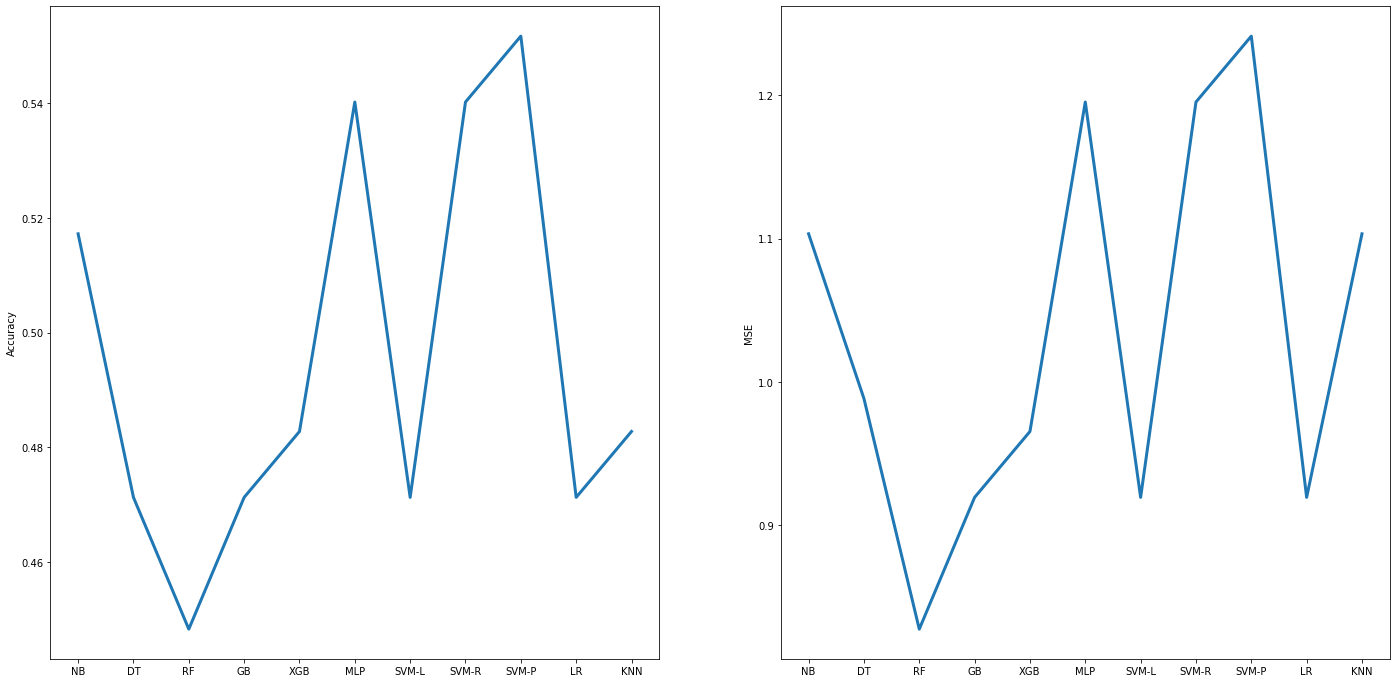

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.lineplot(data=results['Accuracy'], ax=ax[0])
sns.lineplot(data=results['MSE'], ax=ax[1])
plt.show()

### 결론
* SVM-P 사용할 때 성과과 제일 좋음! 우리의 시스템에도 SVM-R 적용하면 주가 업다운 예측을 잘할 수 있다!
* 하지만 대체적으노 accuracy가 그렇게 높지 않아 더 보완이 필요하다! (더 많은 데이터, 감성사전의 엄밀성... 등등)